<a href="https://colab.research.google.com/github/Chalwemwansa/data_mining_assign/blob/master/Group_22_data_mining_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## Problem Statement

The reliability and usefulness of Zambian Wikipedia pages as a source of current information can be affected when the content becomes outdated  
In many cases information that once was accurate is left unchanged for long periods of time and this makes it hard for readers to trust that what they are reading reflects the present situation  

Without a clear and organized way to identify which pages are stale or contain old data it is difficult for contributors especially Zambian Wikipedians to know where their attention is most needed  
This lack of direction means that updates can be random or uneven and some topics remain untouched while others are repeatedly edited  

Over time this results in a reduced quality of content on and about Zambia making the platform less valuable as a resource for people who rely on it for research learning or keeping up with developments in the country.


## Business Objectives

From a practical real world view success for this project means being able to identify what is old and what is still current  
It is about detecting and flagging sections or whole Zambian Wikipedia pages like the Zambia page that hold stale facts  
Clear signals help both readers and editors see where drift has happened and how serious it is  

The next step is to make updates easier not harder  
Contributors especially Zambian Wikipedians need a simple way to spot which pages or sections most need attention for factual recency  
This supports the DataLab Research group as it explores strategies for improving contributions on and about Zambia  
Having a clear queue of priority pages is more useful than relying on guesswork or scattered edits  

The long term aim is to raise the overall currency of information on Wikipedia pages about Zambia  
Fresher content increases trust and value whether the pages are used in schools in media or in everyday research  
When updates become routine and guided the quality of the whole collection improves steadily  

These objectives align with the CRISP DM phase of Business Understanding  
Here the aim is to define broad and specific goals while also staying close to the needs of the community that relies on and contributes to this knowledge  


This foundation ensures that later technical steps—like data preparation, modeling, and evaluation—stay tied to real impact and community relevance.

## Data Mining

To meet the business obejectives, our task is to develop a classification model that can label the recency of content on Zambian Wikipedia pages. Each section would be tagged as 'Current','Moderately Outdated' or 'Severely Outdated', giving contributors and readers a quick sense of accuracy. This turns the challenge of stale information into a clear, structured task.

Beyond classification, we also aim to analyse edit histories to reveal how quickly different topics become outdated. Some pages, like those on politics, may need frequent updates, while others such as geography remain stable for longer. Spotting these trends helps contributors anticipate where attention will be needed next.

Finally, the project should provide ranking metrics that highlight high-priority pages. Instead of random edits, contributors can follow a clear queue that shows where updates will have the most impact. In this way, data mining goals directly support fresher, more reliable information on Wikipedia pages about Zambia

## Initial Project Success Criteria

Our initial criteria for project success will be measured by:

- **Classification Accuracy**  
  The classification model should achieve an accuracy of at least 85% in correctly identifying the recency level of data on Zambian Wikipedia pages. This will serve as a key benchmark for determining whether the project is meeting its early objectives  

- **Interpretability and Actionability**  
  The predictions of the model and the factors influencing them must be understandable to human editors. Contributors should be able to see why a page is flagged as outdated and also get clear guidance on what needs updating. The results should be actionable so Wikipedians can focus their efforts where they matter most  

- **Scalability**  
  The model should be capable of being applied to a wide range of Zambian Wikipedia pages and not just a single Zambia page. Broader application will make the tool useful for long term and large scale improvements  

- **Feedback Integration**  
  Another measure of success will be how well the model's insights can be integrated into a tool or dashboard that Wikipedians can use. This would allow contributors to receive notifications or recommendations for content updates in a more structured and user friendly way  

These criteria provide a practical way of measuring the relative success of the project and align with the "Key Success Criteria" aspect of the CRISP-DM Business Understanding phase  


This section completes the first phase of the project under the CRISP-DM methodology which focuses on understanding the overall business context and clearly identifying the challenge that needs to be solved  

The reliability and usefulness of Zambian Wikipedia pages as a source of current information is at risk when articles are left without updates for long periods of time  
Information that may have been accurate at one point becomes outdated over time and this makes it harder for readers to trust that the content reflects the present situation in Zambia  

There is currently no clear or systematic way to highlight which pages have stale or outdated data  
Because of this contributors especially Zambian Wikipedians often do not know where to direct their efforts resulting in random or uneven updates where some articles receive frequent edits while others are overlooked  

This lack of focus reduces the overall quality of information about Zambia on Wikipedia and makes the platform less useful for researchers students and the general public who rely on it for accurate and up to date content  

The next phases of this project following the CRISP-DM process will move into Data Understanding and Data Preparation  
For this checkpoint the deliverables include adding this content to the Google Colab notebook and creating a corresponding section in the README.md file with at least one commit per team member properly tagged to document individual contributions  

# 2. Data Understanding

In [18]:
# installing the necessay packages

!pip install pandas matplotlib

In [19]:
# mount drive to colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# read the csv file containing the data set for our use case
import pandas as pd

recency_wiki_csv = pd.read_csv("/content/drive/MyDrive/CollabData/zambia_wikipedia_search.csv")

In [21]:
recency_wiki_csv.columns

Index(['ns', 'title', 'pageid', 'size', 'wordcount', 'snippet', 'timestamp'], dtype='object')

In [22]:
recency_wiki_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ns         500 non-null    int64 
 1   title      500 non-null    object
 2   pageid     500 non-null    int64 
 3   size       500 non-null    int64 
 4   wordcount  500 non-null    int64 
 5   snippet    500 non-null    object
 6   timestamp  500 non-null    object
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [23]:
recency_wiki_csv.describe()

,ns,pageid,size,wordcount
count,500.0,5.000000e+02,500.000000,500.000000
mean,0.0,3.289466e+07,14852.682000,1157.430000
std,0.0,2.756898e+07,19735.161518,1696.137922
min,0.0,7.080000e+02,244.000000,14.000000
25%,0.0,4.667468e+06,4024.500000,226.750000
50%,0.0,2.861557e+07,8822.500000,612.500000
75%,0.0,5.908866e+07,18043.000000,1351.750000
max,0.0,8.071573e+07,235161.000000,16058.000000


In [24]:
recency_wiki_csv.shape

(500, 7)

In [25]:
recency_wiki_csv.head(1).T

,0
ns,0
title,Zambia
pageid,34415
size,151954
wordcount,14712
snippet,"<span class=""searchmatch"">Zambia</span>, offic..."
timestamp,2025-08-13T06:32:53Z


In [26]:
recency_wiki_csv.tail().T

,495,496,497,498,499
ns,0,0,0,0,0
title,Church of the Province of Central Africa,Maureen Mwanawasa,List of power stations in Zambia,Order of the Eagle of Zambia,COSAFA Cup
pageid,6298351,19156863,25778283,43721376,3776132
size,14288,9551,10095,1068,28045
wordcount,1240,950,430,55,433
snippet,"of the Anglican Communion, and includes 15 dio...",Maureen Mwanawasa (née Kakubo; 28 April 1963 –...,"<span class=""searchmatch"">Zambia</span> has fi...","The Order of the Eagle of <span class=""searchm...","Tanzania, Uganda and Senegal. <span class=""sea..."
timestamp,2025-06-17T13:50:26Z,2025-08-14T14:24:01Z,2025-07-05T00:51:51Z,2025-01-06T15:13:56Z,2025-08-11T21:59:14Z


In [27]:
 #  import matplotli.pyplot as plt for Data virsualization
import matplotlib.pyplot as plt

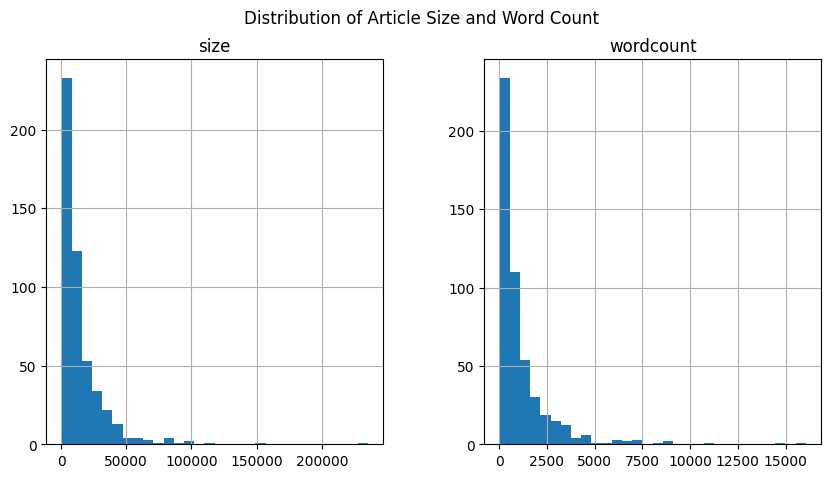

In [29]:
recency_wiki_csv[['size', 'wordcount']].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of Article Size and Word Count")
plt.show()